<a href="https://colab.research.google.com/github/Deadpoollll-max/Time-Series-Analysis---Stock---Using-ML/blob/main/Naive_Forecast.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

In [13]:
from sklearn.metrics import mean_absolute_percentage_error, \
mean_absolute_error, r2_score , mean_squared_error

#here we imported MAPE , MAE , R Squared , MAE methods for evaluation.

In [14]:
!wget - nc https://lazyprogrammer.me/course_files/SPY.csv

# this file contains prices of S&P 500

--2025-10-30 21:11:06--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2025-10-30 21:11:06--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2025-10-30 21:11:06--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv.1’

SPY.csv.1           100%[===================>] 246.03K  --.-KB/s    in 0.05s   

2025-10-30 21:11:06 (4.88 MB/s) - ‘SPY.csv.1’ saved [251935/251935]

FINISHED --2025-10-30 21:11:06--
Total wall clock time: 0.3s
Downloaded: 1 files, 246K in 0.05s (4.88 MB/s)


In [15]:
df = pd.read_csv('SPY.csv', index_col = 'Date', parse_dates=True)

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [17]:
# Here we implement Naice Prediction so here we basically just add a new forecast where we simply predict the previous value by calling the shift function on the close

df['ClosePrediction']=df['Close'].shift(1)

In [18]:
df.head()

# Notice how first row contains not a number, since, ofcourse, there is no last value for rhw first row

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [19]:
# For convenience, we're going to assign the true closed price to a variable called y_true and the predicted closed prices to a variable called y_pred

y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

**METRICS :**

Main Idea : get a feel for how the value relate to one another. What's "good"? What's "bad"? if the R(squared) is "good" , will the MAE  also be "good"?

In [20]:
# SSE : Squared Sum Error
# Since y_true & y_pred are effectively one dimensiona arrays, we can just take the difference and do a dot product with the same difference

(y_true - y_pred).dot(y_true - y_pred)


np.float64(6330.3742894926045)

In [21]:
# MSE : Mean Squared Error

mean_squared_error(y_true, y_pred)

2.798573956451196

In [22]:
# MSE : Mean Squared Error
# Don't be afraid to implement things yourself
# It should be easy (and good exercise for your brain)

(y_true - y_pred).dot(y_true - y_pred)/len(y_true)

np.float64(2.7985739564511958)

In [24]:
# RMSE : Root Mean Squared Error
# RMSE is basically Root(MSE)

np.sqrt((y_true - y_pred).dot(y_true - y_pred)/len(y_true))

np.float64(1.6728938867875618)

In [26]:
# RMSE : Root Mean Squared Error

np.sqrt(mean_squared_error(y_true, y_pred))

np.float64(1.672893886787562)

In [27]:
# MAE : Mean Absolute Error

mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [28]:
# R^2

r2_score(y_true, y_pred)

# Great prediction
# But why is it soo good? Be suspecious..

0.9989603259063914

In [29]:
# MAPE : Mean Absolute Percentage Error

mean_absolute_percentage_error(y_true, y_pred)

# Even greater prediction
# Be more suspecioussMAPE :Symmetric Mean AbsolsMAPE :Symmetric Mean Absolute Percentage Errorute Percentage Error

0.006494073151422373

**sMAPE :Symmetric Mean Absolute Percentage Error**

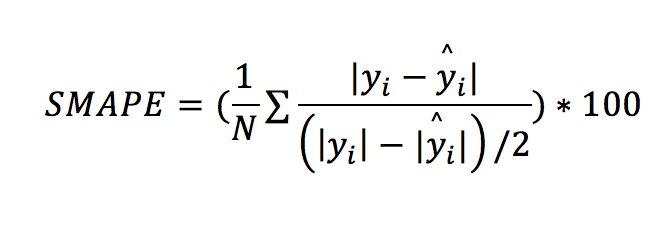


In [30]:
# sMAPE
# not implemented, oh well...
# Good thing we know how to get anything done..!

def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
  return np.mean(numerator / denominator)

smape(y_true, y_pred)

np.float64(0.006491365814068417)